# Tobig's 20기 정규세션 1주차 과제(1): EDA

- 제출자: 20기 황태연
- 제출 일자: 2023.07.25. (화)

- **과제**
    - 파이썬을 이용하여 전처리 및 EDA 수행하기
        - 결측지, 이상치 검토 (Section 2)
        - 유의미한 시각화 5개 이상 (Section 3)
        - 수치형 변수 간 상관관계 파악 (Section 4)
        - 파생변수 생성 (Section 5)
    - 데이터는 IBM HR Attrition Data 혹은 자신이 원하는 데이터 셋을 사용  
    IBM HR Attrition Data: `https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset`  
    (해당 과제에서는 IBM HR Attrition Data를 사용하였습니다.)

# 0. Background

- **EDA(Exploratory Data Analysis)**: **탐색적 데이터 분석**이라는 뜻이며, </u>데이터의 이해, 결측치와 이상치 식별, 시각화</u> 등의 여러 데이터 분석 방법을 통틀어서 일컫는다.
    - **결측치(Missing Value)**: 데이터 값이 누락되거나 없는 것
    - **이상치(Outlier)**: 일반적인 분포에서 벗어난 데이터 값

- **전처리(Data Pre-processing)**: 데이터를 활용하기에 적합한 형태로 가공하는 과정이다.
    - 결측치와 이상치를 제거하거나 데이터 스케일링(데이터 값의 범위를 조절하는 것) 등이 전처리에 해당한다.
    
- EDA와 전처리를 이용하여 유의미한 데이터를 추출할 수 있다.

- **변수 종류**
    - **Numerical(수치형) 변수**: 수치적인 값을 가지는 변수
        - **Continuous(연속형) 변수**: 값이 연속적인 변수
            - 예: 급여, 거리, 시간
        - **Discrete(이산형) 변수**: 값을 셀 수 있는 변수
            - 예: 나이, 근속 연수
        - Numerical 변수는 **Regression(회귀)**으로 분석한다.
    - **Categorial(범주형) 변수**: 범주로 분류가 가능한 변수
        - **Nominal(명목형) 변수**: 순서가 없는 범주형 변수
            - 예: 업부 분야, 전공
        - **Binary(이분형) 변수**: 2가지 상태만 존재하는 Nominal
            - 예: 성별, 18세 이상 여부, 결혼 여부
        - **Ordinal(순서형) 변수**: 순서가 있는 범주형 변수
            - 예: 직급, 등급
        - Categorical 변수는 **Classification(분류)**으로 분석한다.
- 상황에 따라 Numerical 변수와 Categorical 변수가 모두 가능한 변수가 존재한다.
    - 예: 직원 ID는 수치적으로 표현되므로 Numerical 변수처럼 다룰 수 있지만, ID의 순서가 수치적으로 의미가 없다면 그룹을 지어 Categorical 변수처럼 다룰 수도 있다.

# 1. 데이터 불러오기

- **pandas 라이브러리**를 이용해서 데이터의 전반적인 내용을 확인한다.

In [1]:
import pandas as pd # pandas 라이브러리 import

- pd.read_csv(filepath): filepath에 저장된 파일을 불러와서 DataFrame 형태로 반환한다.

In [2]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab/Tobigs20/Week01/Week01_EDA/IBM-HR-Employee-Attrition.csv') # 데이터 불러오기

- pd.set_option('display.max_columns', None): 앞으로 데이터를 출력할 때에는 모든 열을 출력한다.  
(만약 이 작업을 하지 않으면, 많은 열을 가진 데이터를 출력할 때에 '...'으로 생략되는 열이 발생한다.)

In [4]:
pd.set_option('display.max_columns', None)

- **pd.DataFrame.head()**: DataFrame의 상위 5행을 출력한다.

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


- **pd.DataFrame.tail()**: DataFrame의 하위 5행을 출력한다.

In [6]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


- **pd.DataFrame.info()**: 데이터의 전반적인 정보를 출력한다.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- **pd.Dataframe.describe()**: 데이터의 통계량을 요약하여 보여준다.

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- 데이터의 각 변수는 **Numerical 변수**인지 **Categorical 변수**인지 여부에 따라 분석 방법이 달라진다. 앞에서 구한 정보들로 각 변수를 종류에 따라 나눠보자.

- **Numerical 변수**는 <font color="green">**초록색**</font>, **Categorical 변수**는 <font color="blue">**파란색**</font>으로 표시한다. 특별히, Target 변수는 <font color="red">빨간색</font>로 나타냈다.
- Numerical 변수와 Categorical 변수로 분석하는 것이 모두 가능한 데이터는 <font color="purple">**보라색**</font>으로 표시한다.
- Numerical 변수와 Categorical 변수로 구분하는 것이 의미 없다고 판단되는 것은 검은색으로 나타낸다.
    - 예를 들어, 모든 값이 똑같은 변수(18세 이상 여부, 표준 시간 등)나 직원 ID는 분석하는 것이 의미 없을 것임을 추측할 수 있다.
0. Age : 해당 직원의 나이 (예: 41, 49) <font color="green">(Numerical, Discrete)</font>
1. Attrition : 퇴직 여부 Target값 (예: Yes, No) <font color="red">(Categorical, Binary)</font>
2. BusinessTravel : 출장의 빈도 (예: Travel_Rarely, Travel_Frequently) <font color="blue">(Categorical, Ordinal)</font>
3. DailyRate : 일대비 급여의 수준 (예: 1102, 279) <font color="green">(Numerical, Continuous)</font>
4. Department : 업무분야 (예: Sales, Research & Development) <font color="blue">(Categorical, Nominal)</font>
5. DistanceFromHome : 집과의 거리 (예: 1, 8) <font color="green">(Numerical, Continuous)</font>
6. Education : 교육의 정도 (예: 2, 1) <font color="purple">(Numerical, Discrete)(Categorical, Ordinal)</font> \
(kaggle에 1은 Below College, 2는 College 등을 의미한다고 표시되어 있어서 Categorical 변수로 보는 것이 적절하나, 순서가 존재하고 수치적으로 표현이 되어 있어 Numerical 변수로 보고 분석하는 것이 용이할 수도 있다. 인덱스 10, 13, 16, 24, 25, 30에도 동일하게 적용한다.)
7. EducationField : 전공 (예: Life Sciences, Medical) <font color="blue">(Categorical, Nominal)</font>
8. EmployeeCount : 직원 숫자 (예: 1)
9. EmployeeNumber : 직원 ID (예: 1, 2, 4)
10. EnvironmentSatisfaction : 업무 환경에 대한 만족도 (예: 2, 3) <font color="purple">(Numerical, Discrete)(Categorical, Ordinal)</font>
11. Gender : 성별 (예: Female, Male) <font color="blue">(Categorical, Binary)</font>
12. HourlyRate : 시간 대비 급여의 수준 (예: 94, 61) <font color="green">(Numerical, Continuous)</font>
13. JobInvolvement : 업무 참여도 (예: 3, 4) <font color="purple">(Numerical, Discrete)(Categorical, Ordinal)</font>
14. JobLevel : 업무의 수준 (예: 2, 1) <font color="green">(Numerical, Discrete)</font>
15. JobRole : 업무 종류 (예: Sales Executive, Research Scientist) <font color="blue">(Categorical, Nominal)</font>
16. JobSatisfaction : 업무 만족도 (예: 4, 2) <font color="purple">(Numerical, Discrete)(Categorical, Ordinal)</font>
17. MaritalStatus : 결혼 여부 (예: Single, Married, Divorced) <font color="blue">(Categorical, Nominal)</font>
18. MonthlyIncome : 월소득 (예: 5993, 5130) <font color="green">(Numerical, Continuous)</font>
19. MonthlyRate : 월 대비 급여 수준 (예: 19479, 24907) <font color="green">(Numerical, Continuous)</font>
20. NumCompaniesWorked : 일한 회사의 수 (예: 8, 1) <font color="green">(Numerical, Discrete)</font>
21. Over18 : 18세 이상 (예: Y)
22. OverTime : 규정외 노동시간 (예: Yes, No) <font color="blue">(Categorical, Binary)</font>
23. PercentSalaryHike : 급여의 증가분 백분율 (예: 11, 23) <font color="green">(Numerical, Continuous)</font>
24. PerformanceRating : 업무성과 (예: 3, 4) <font color="purple">(Numerical, Discrete)(Categorical, Ordinal)</font>
25. RelationshipSatisfaction : 대인관계 만족도 (예: 4, 1) <font color="purple">(Numerical, Discrete)(Categorical, Ordinal)</font>
26. StandardHours : 표준 시간 (예: 80)
27. StockOptionLevel : 스톡옵션 정도 (예: 0, 1, 3) <font color="green">(Numerical, Discrete)</font>
28. TotalWorkingYears : 경력 기간 (예: 8, 10) <font color="green">(Numerical, Discrete)</font>
29. TrainingTimesLastYear : 교육 시간 (예: 0, 3, 2) <font color="green">(Numerical, Discrete)</font>
30. WorkLifeBalance : 일과생활의 균형 정도 (예: 1, 3, 2) <font color="purple">(Numerical, Discrete)(Categorical, Ordinal)</font>
31. YearsAtCompany : 근속 연수 (예: 6, 10) <font color="green">(Numerical, Discrete)</font>
32. YearsInCurrentRole : 현재 역할의 년수 (예: 4, 7) <font color="green">(Numerical, Discrete)</font>
33. YearsSinceLastPromotion : 마지막 프로모션 (예: 0, 1, 3) <font color="green">(Numerical, Discrete)</font>
34. YearsWithCurrManager : 현재 관리자와 함께 보낸 시간 (예: 5, 7) <font color="green">(Numerical, Discrete)</font>

- 인덱스로 Numerical, Categorical 변수를 분리하면 다음과 같다.
    - <font color="green">**Numerical 변수**</font>: 0, 3, 5, 6, 10, 12, 13, 14, 16, 18, 19, 20, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34
    - <font color="blue">**Categorical 변수**</font>: 1, 2, 4, 6, 7, 10, 11, 13, 15, 16, 17, 22, 24, 25, 30
- 특히, Numerical 변수와 Categorical 변수로 분석하는 것이 모두 가능한 변수는 다음과 같다.
    - <font color="purple">**Numerical + Categorical**</font>: 6, 10, 13, 16, 24, 25, 30
    - 대부분 1에서 5까지의 자연수 중 하나의 값을 갖는 변수이다. (6번 인덱스 설명 참고)

# 2. 결측치, 이상치 검토

## 2.1. 결측치 탐색

- **pd.DataFrame.isna()**: 데이터의 각 원소가 'NaN' 또는 'None'과 같은 결측치이면 True, 그렇지 않으면 False를 반환한다.
    - pd.DataFrame.isnull()은 위 메소드와 완전 동일한 기능을 수행한다.

In [9]:
df.isna()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


- 각 열의 True의 개수를 아래와 같이 셀 수 있다.

In [10]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- 위 결과를 통해 해당 데이터에는 결측치가 없음을 확인할 수 있다.

## 2.2. 이상치 탐색

- 이상치를 탐색하는 방법은 단변량 자료일 때와 다변량 자료일 때로 구분할 수 있다.
    1. 단변량 자료에서의 이상치 탐색
        - 예: 표준화 점수, 사분위수 범위 등
    2. 다변량 자료에서의 이상치 탐색
        - 예: 회귀진단, 마할라노비스 진단, LOF, iForest 등
- 이 중 단변량 자료에서의 이상치 탐색만 다룬다.

1. **표준화 점수(Z-score)**: 데이터의 평균과 표준편차에 대하여 각 원소가 평균으로부터 떨어져 있는 정도를 표준편차로 표현한 것이다.
    - <u>표준화 점수의 절댓값이 3 초과</u>이면 이상치로 판단한다.
    - 단, 이 방법은 평균과 표준편차가 이상치에 영향을 받는다는 문제점이 있어서 중앙값과 중앙값 절대편차를 대신 이용하기도 한다. 이를 **수정된 표준화 점수(Modified Z-score)**라 한다.

<img src="https://drive.google.com/uc?id=1_7ENTBdR-eKFneGgdodM5fYiSl-R78SB" width=70% height=70%>

- DataFrame의 Z-score를 계산하는 함수를 구현해보자.

In [11]:
import numpy as np

def outlier_z_score(df):
    """
    input: z-score를 계산하고자 하는 DataFrame
    output: z-score에서 이상치로 판단되는 원소는 True를, 그렇지 않으면 False를 반환
    """
    mean = df.mean(numeric_only=True) # 평균 계산 (numeric_only=True는 수치형 데이터만 계산하겠다는 의미이다.)
    std = df.std(numeric_only=True) # 표준편차 계산
    z = (df - mean) / std # z-score 계산

    return np.abs(z) > 3 # z-score의 절댓값이 3 초과인 것은 True, 그렇지 않으면 False 반환

In [12]:
outlier_z_score(df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
outlier_z_score(df).sum()

Age                          0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears           16
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany              25
YearsInC

- **seaborn 라이브러리**는 데이터 시각화에 유용한 라이브러리이다.
- DataFrame의 Z-score를 시각화하여 이상치가 어디에 있는지 확인해보자.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def z_score_plot(df):
    """
    input: DataFrame 중 z-score를 시각화 할 columns
    print: z-score를 시각화한 그래프를 출력
    """
    mean = df.mean(numeric_only=True)
    std = df.std(numeric_only=True)
    z = (df - mean) / std

    # Z-score 시각화
    num_col = z.shape[1] # column의 개수
    num_max = int(np.ceil(np.sqrt(num_col))) # 출력할 plot의 행과 열 개수
    fig, axes = plt.subplots(num_max, num_max, figsize=(12, 12))

    for i, col in enumerate(z.columns):
        r = i // num_max
        c = i % num_max
        sns.histplot(z[col], kde=True, ax=axes[r, c]) # histogram을 그린다. 이때 kde는 커널밀도추정으로, 확률밀도함수를 추정한다.
        axes[r, c].set_xlabel(col)
        axes[r, c].set_ylabel('Count')
        axes[r, c].set_title(f'Z-score plot')
    plt.tight_layout()
    plt.show()

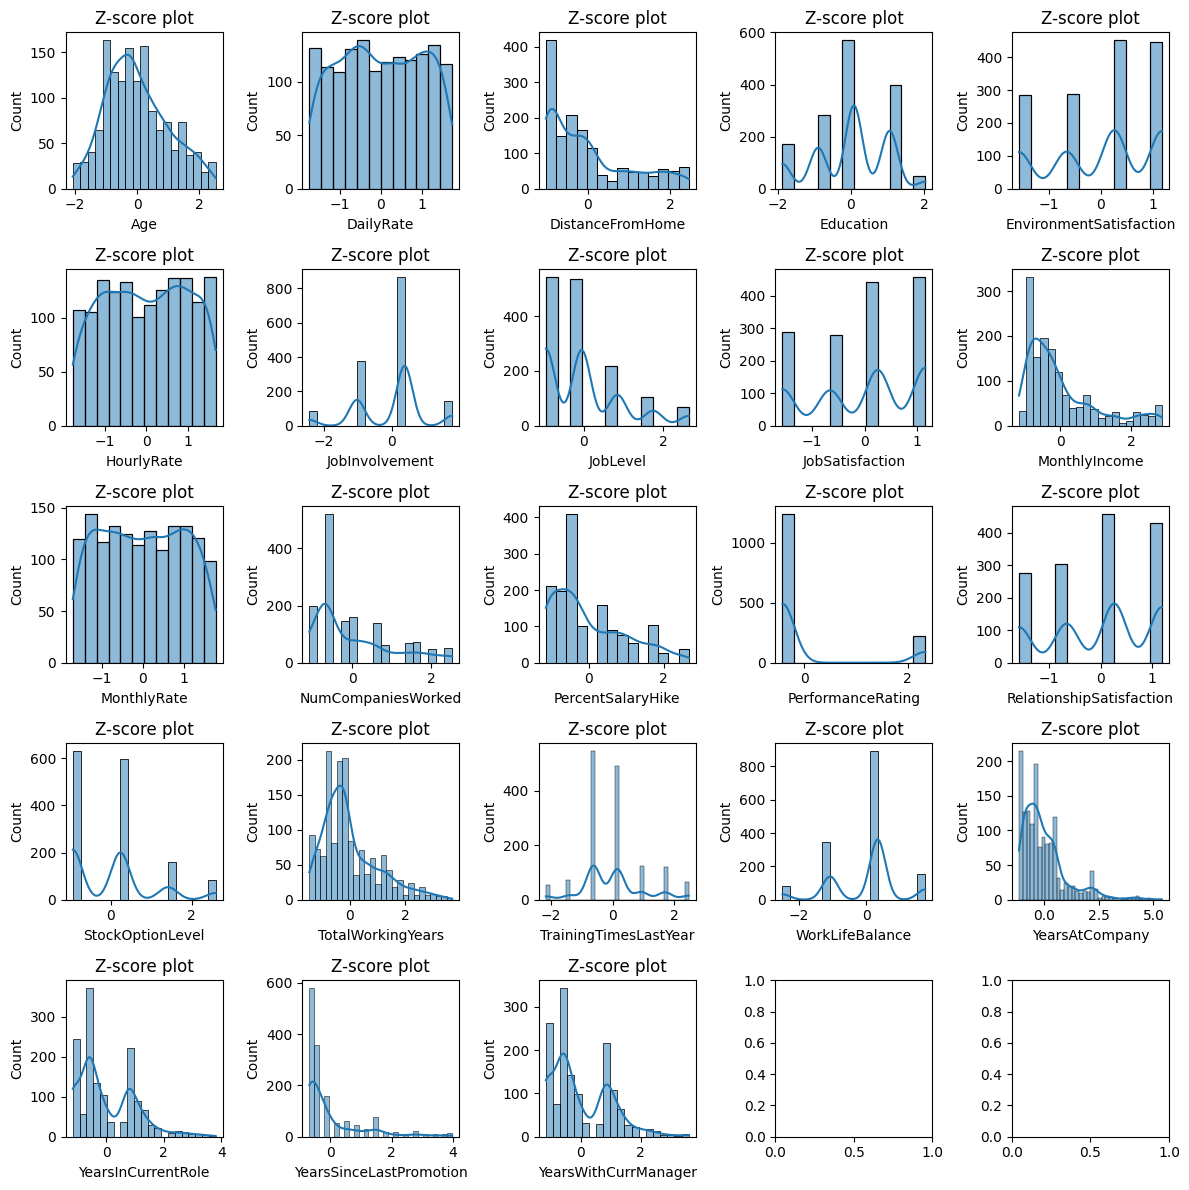

In [15]:
numerical_indices = [0, 3, 5, 6, 10, 12, 13, 14, 16, 18, 19, 20, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34] # 수치형 변수들
z_score_plot(df.iloc[:, numerical_indices])

- 위 그래프에서 Z-score가 -3 미만이거나 3 초과이면 이상치로 판단할 수 있다.

2. **사분위수 범위(IQR, Interquartile Range)**: 제3사분위수(하위 75%, $Q_3$)와 제1사분위수(하위 25%, $Q_1$)의 차이를 의미한다.
    - $Q_1-1.5IQR$ 미만이거나 $Q_3+1.5IQR$ 초과이면 이상치로 판단한다.
    - 아래 그림은 상자그림(Box Plot)으로 사분위수와 사분위수 범위를 표현한 것이다.

<img src="https://drive.google.com/uc?id=1qv9Plh6FXZhKQ30k_AEe3Wfqfntt8T1w" width=70% height=70%>

- DataFrame의 사분위수 범위를 계산하여 이상치를 판별하자.

In [16]:
def outlier_IQR(df, scale=1.5):
    """
    input: DataFrame
    output: Q1 - 1.5IQR보다 작거나 Q3 + 1.5IQR보다 크면 이상치로 판단하여 True를, 그렇지 않으면 False를 반환
    """
    Q1 = df.quantile(0.25, numeric_only=True) # 제1사분위수
    Q3 = df.quantile(0.75, numeric_only=True) # 제3사분위수
    IQR = Q3-Q1 # 사분위수 범위

    return (df < Q1 - scale*IQR) | (df > Q3 + scale*IQR)

In [17]:
outlier_IQR(df.iloc[:, numerical_indices])

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
outlier_IQR(df.iloc[:, numerical_indices]).sum()

Age                           0
DailyRate                     0
DistanceFromHome              0
Education                     0
EnvironmentSatisfaction       0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobSatisfaction               0
MonthlyIncome               114
MonthlyRate                   0
NumCompaniesWorked           52
PercentSalaryHike             0
PerformanceRating           226
RelationshipSatisfaction      0
StockOptionLevel             85
TotalWorkingYears            63
TrainingTimesLastYear       238
WorkLifeBalance               0
YearsAtCompany              104
YearsInCurrentRole           21
YearsSinceLastPromotion     107
YearsWithCurrManager         14
dtype: int64

- IQR을 시각화해주는 **상자그림(box plot)**을 출력해보자.

In [19]:
def box_plot(df):
    """
    input: DataFrame 중 IQR을 시각화 할 columns
    print: box plot 출력
    """
    # box plot
    num_col = df.shape[1] # column의 개수
    num_row = int(np.ceil(num_col / 5)) # 출력할 plot의 행 개수 (한 행에 5개씩 출력)
    fig, axes = plt.subplots(num_row, 1, figsize=(12, 8*num_row))

    if num_row == 1:
        sns.boxplot(df)
    else:
        for r in range(num_row):
            start_idx = 5 * r
            end_idx = min(5 * (r + 1), num_col)  # 마지막 행은 남은 개수만큼 출력
            sns.boxplot(df.iloc[:, start_idx:end_idx], ax=axes[r])
    plt.tight_layout()
    plt.show()

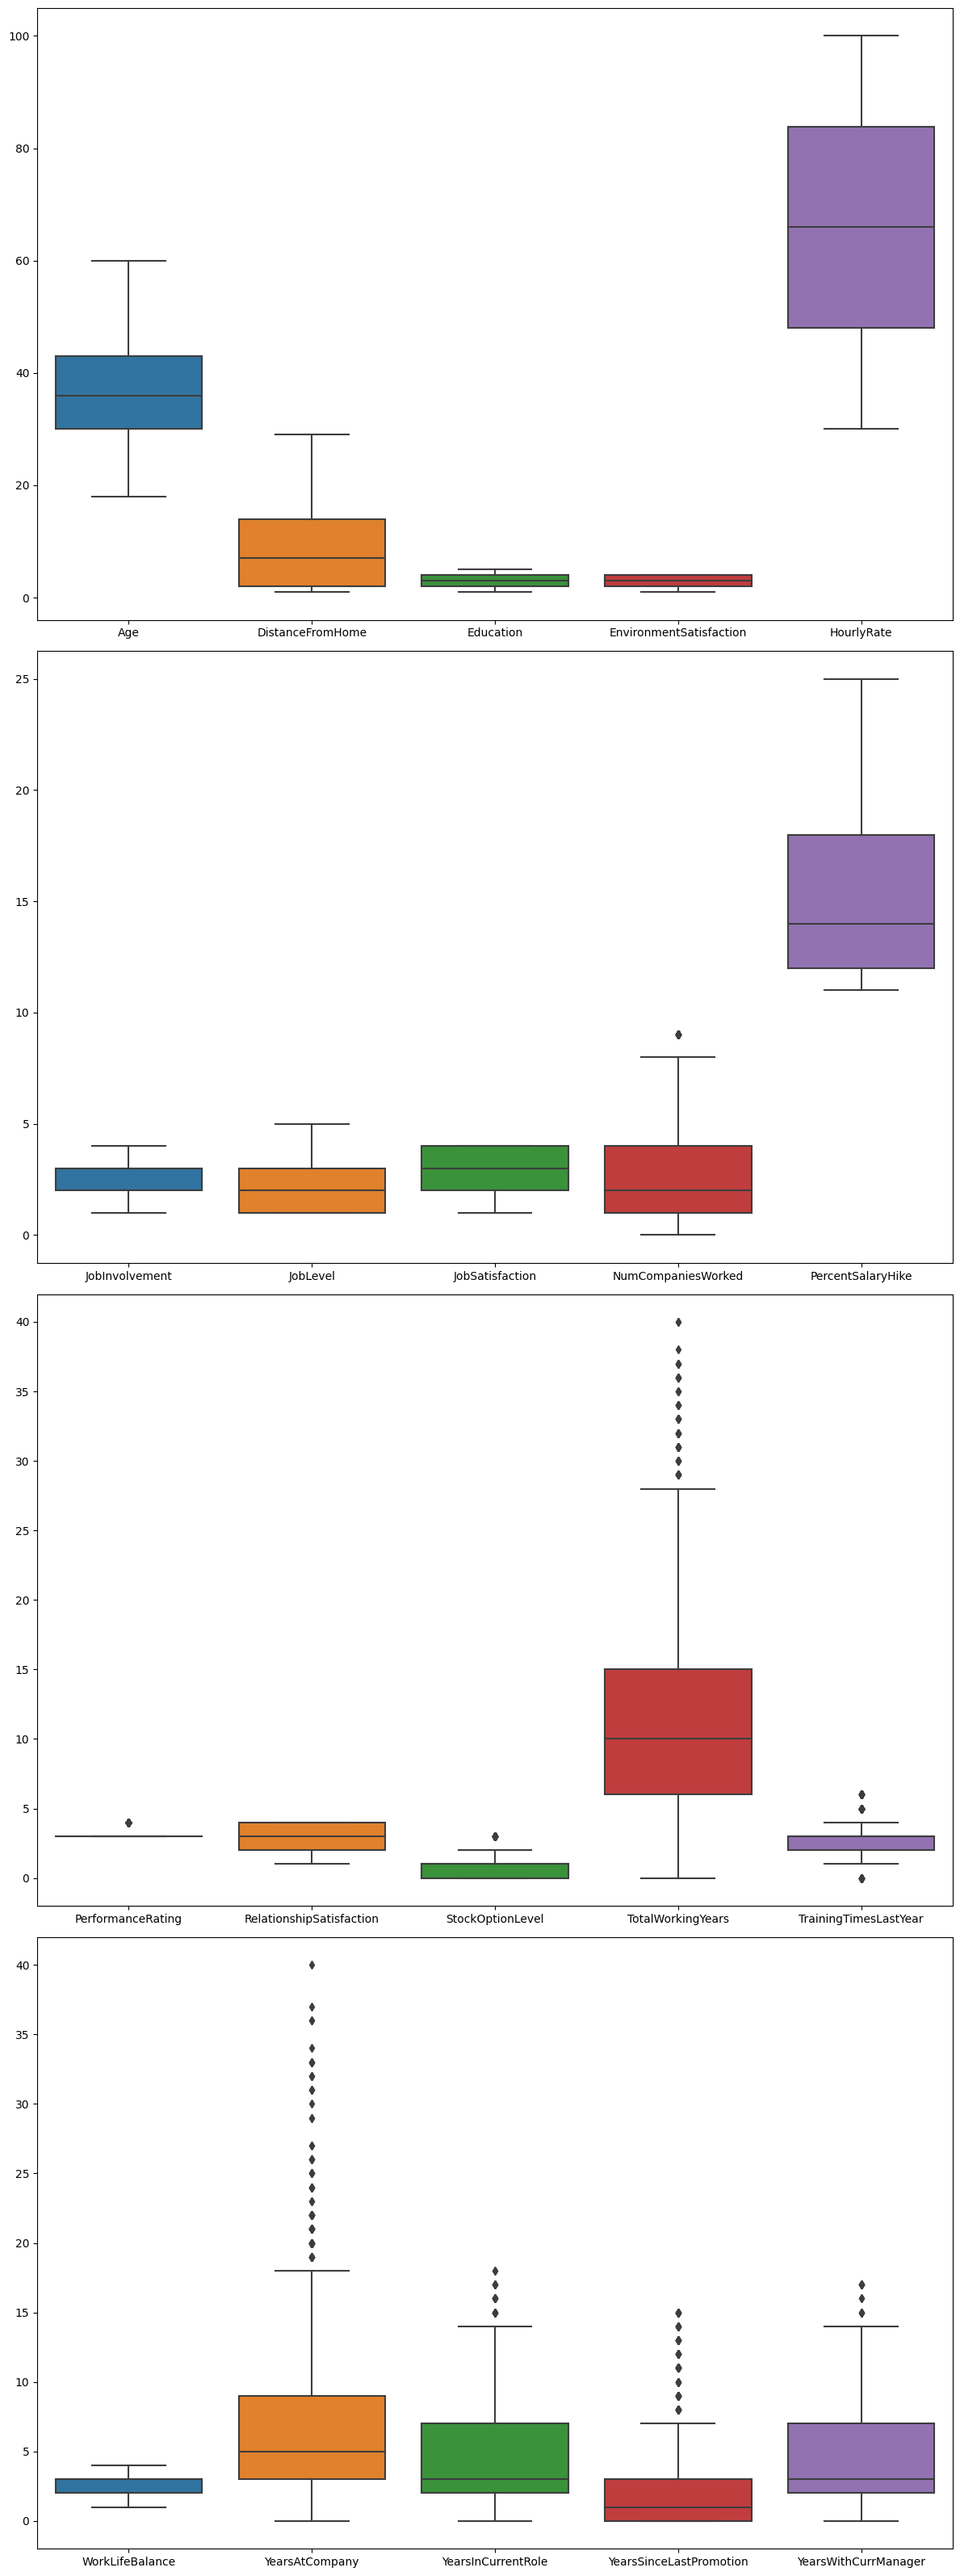

In [20]:
# 값이 비슷한 속성끼리 box_plot을 출력하고자 한다.
box_plot(df.iloc[:, [0, 5, 6, 10, 12, 13, 14, 16, 20, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34]])

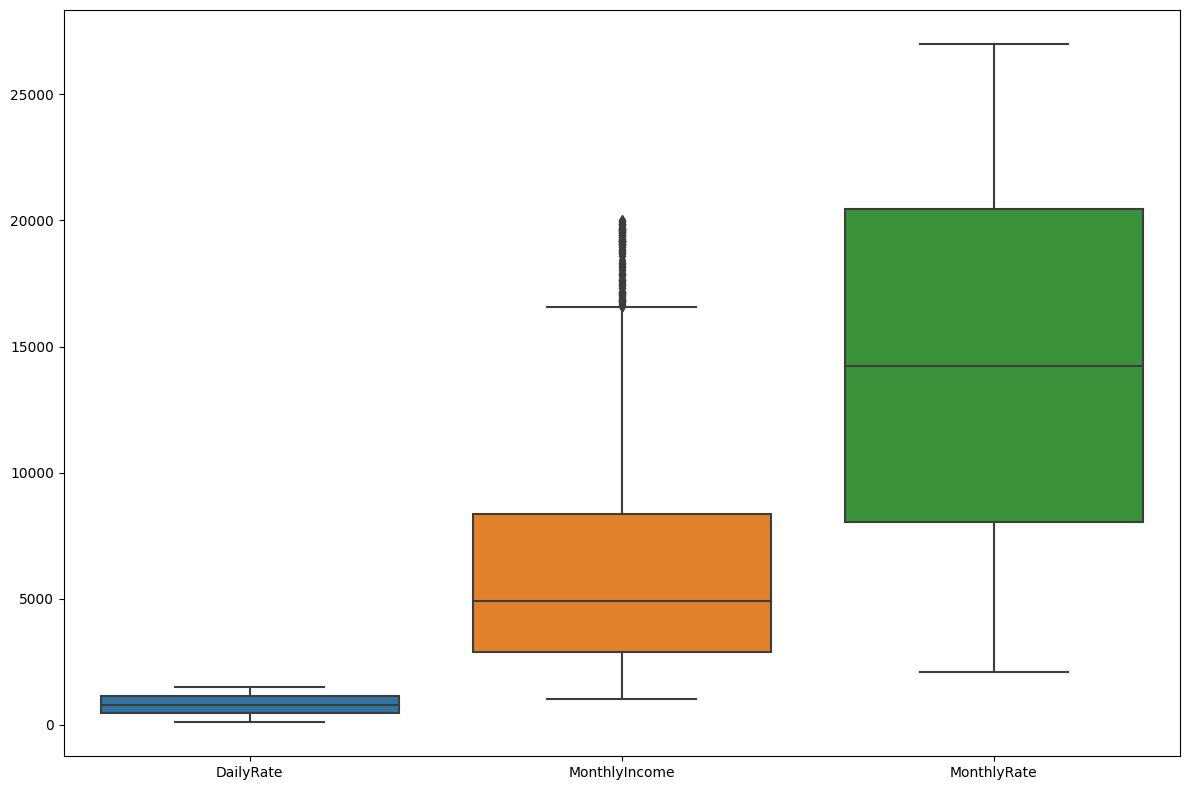

In [21]:
box_plot(df.iloc[:, [3, 18, 19]])

- 위 상자그림에서 기호 $\bullet$가 이상치임을 알 수 있다.

- 여기에서의 문제점 다음과 같다.
    - 'Performance Rate'는 항상 3 또는 4인데, IQR에서는 Q3-Q1이 0이 되어서 4를 모두 이상치로 판단하게 된다.

## 2.3. 이상치 제거 (전처리)

- IQR로 발견한 이상치를 제거하는 함수를 구현해보자.

In [22]:
def remove_outliers(df, selected_df, scale=1.5):
    """
    input
    - DataFrame: 이상치 제거의 대상이 되는 DataFrame
    - selected_df: 이상치 제거를 하기 원하는 속성만을 담은 DataFrame
    - scale(IQR 계산 시 기준을 1.5가 아닌 다른 숫자로 설정할 수도 있다.)
    output: IQR로 발견한 이상치가 제거된 DataFrame
    """
    outliers = outlier_IQR(selected_df, scale) # 이상치는 True, 그렇지 않으면 False
    remove_rows = outliers.index[outliers.any(axis=1)] # True 원소를 가진 행 번호를 모두 추출
    removed_df = df.drop(index=remove_rows) # 이상치를 갖는 모든 행 제거
    return removed_df

In [23]:
import copy

numerical_indices_copy = copy.deepcopy(numerical_indices) # 깊은 복사를 통해 아예 새로운 리스트로 만든다.
numerical_indices_copy.remove(24) # IQR에서 발생한 문제점을 해결하기 위해 Performance Rate는 이상치 제거 대상에서 제외한다.
remove_outliers(df, df.iloc[:, numerical_indices_copy])

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,2,Male,74,3,2,Manufacturing Director,1,Single,9936,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,4,Female,30,2,1,Sales Representative,3,Single,2966,21378,0,Y,No,18,3,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


- 위에서 이상치가 있는 행을 제거한 모습을 확인할 수 있다.
- 그러나 너무 많은 이상치가 제거되었기 때문에, IQR 계산 시 기준이 되는 scale인 1.5를 3.0으로 조정하여 전처리하겠다.
    - scale이 1.5일 때는 **이상치**라 한다.
    - scale이 3.0일 때는 **극단적 이상치**라 한다.

In [24]:
removed_df = remove_outliers(df, df.iloc[:, numerical_indices_copy], 3.0)
removed_df # 이상치가 제거된 데이터

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


# 3. 유의미한 시각화

- 앞에서 이상치를 탐색하기 위한 두 가지 유의미한 시각화(**histogram**, **box plot**)를 확인해보았다.
- 3가지 시각화 방법을 더 알아보자.

## 3.1. 모자이크 플롯(Mosaic Plot)

- **모자이크 플롯**: <u>범주형과 범주형 데이터의 관계</u>를 서로 비교하기 위한 시각화 기법
- **statsmodels 라이브러리**는 모자이크 플롯 등을 지원하는 통계 분석 라이브러리이다. 이를 이용하여 시각화해보자.

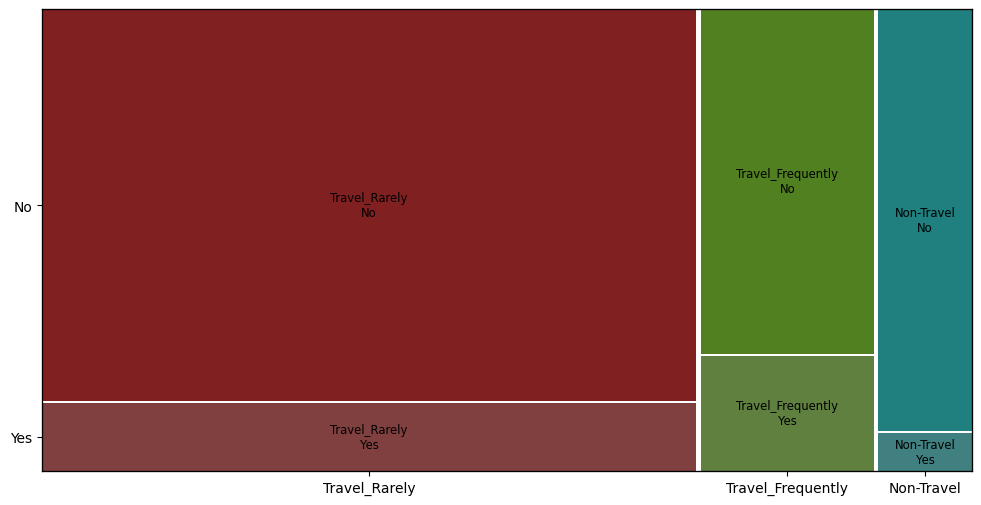

In [25]:
from statsmodels.graphics.mosaicplot import mosaic

fig, axes = plt.subplots(1, 1, figsize=(12, 6))
mosaic(removed_df, ['BusinessTravel', 'Attrition'], ax=axes)
plt.show()

- 위 모자이크 플롯을 통해 **출장의 빈도가 높을수록 퇴직한 비율도 높다**고 해석할 수 있다.

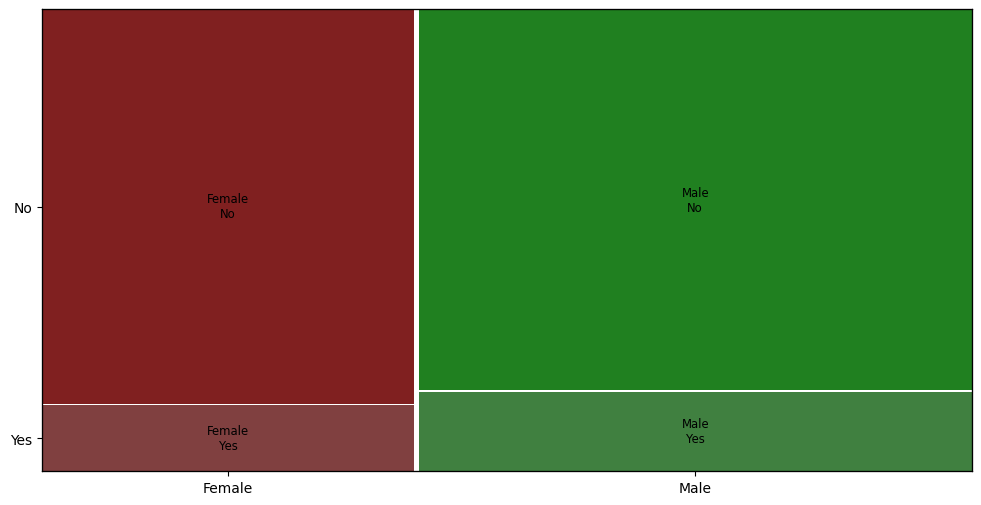

In [26]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
mosaic(removed_df, ['Gender', 'Attrition'], ax=axes)
plt.show()

- 위 모자이크 플롯을 통해 남성의 퇴사비율이 조금 더 높다는 것을 알 수 있지만, **성별이 퇴사 비율에 유의미한 차이를 보이지 않는다**고 해석할 수 있다. 물론, 통계적인 분석이 더 요구된다.

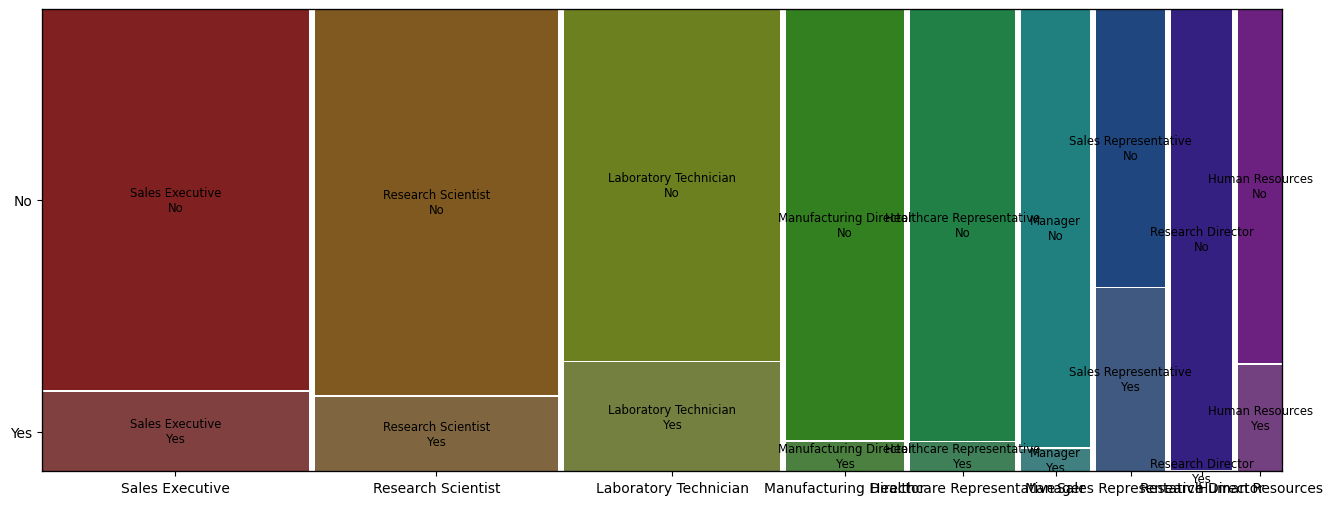

In [27]:
fig, axes = plt.subplots(1, 1, figsize=(16, 6))
mosaic(removed_df, ['JobRole', 'Attrition'], ax=axes)
plt.show()

- 위 모자이크 플롯을 통해 **업무 종류에 따라 퇴사 비율이 크게 차이가 난다**는 것을 알 수 있다.  
Sales Representative 업무를 맡은 사원들은 퇴사 비율이 매우 높으나, Research Director 업무를 맡은 사원들은 퇴사 비율이 매우 낮다.

## 3.2. Side-by-side Box Plot

- **Side-by-side Box Plot**: box plot을 이용하여 <u>수치형과 범주형 데이터의 관계</u>를 서로 비교하기 위한 시각화 기법

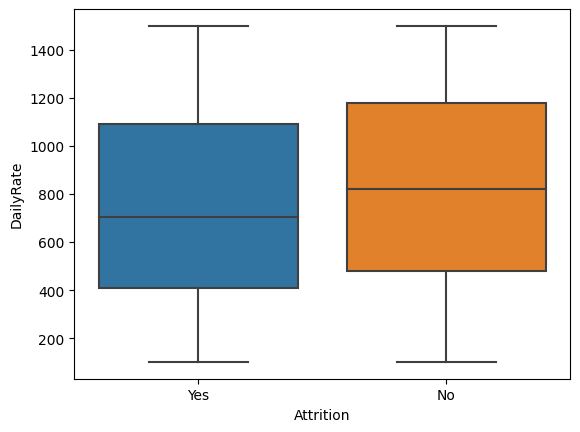

In [28]:
sns.boxplot(x='Attrition', y='DailyRate', data=removed_df)
plt.show()

- 위 box plot을 통해 **퇴직한 사람들은 일 대비 급여의 수준이 상대적으로 낮다**는 것을 알 수 있다.

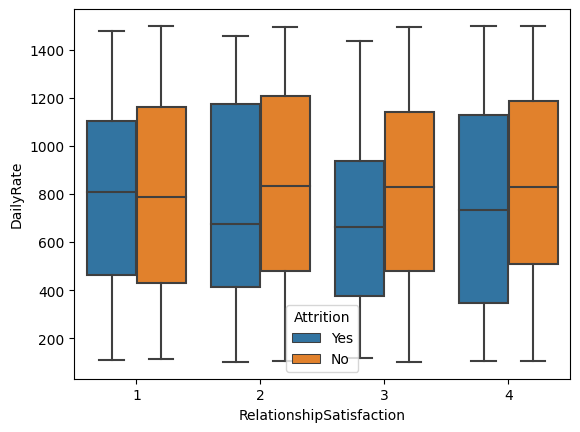

In [29]:
sns.boxplot(x='RelationshipSatisfaction', y='DailyRate', data=removed_df, hue='Attrition')
plt.show()

- 위 box plot을 통해 대체적으로 퇴직한 사람들은 일 대비 급여의 수준이 상대적으로 낮지만, **대인관계 만족도가 낮으면 일 대비 급여의 수준에 상관없이 퇴사를 하기도 한다**고 해석할 수 있다.
    - 대인관계 만족도가 2, 3, 4인 경우 모두 퇴사한 사람들의 일 대비 급여의 중간값이 상대적으로 낮지만,  
    대인관계 만족도가 1인 경우 근소하게 오히려 반대임을 확인할 수 있다.

## 3.3. 산점도(Scatter Plot)

- **산점도(Scatter Plot)**: 평면 위에 점을 찍는 방식으로 <u>수치형과 수치형 데이터 사이</u>의 상관관계를 분석하는 기법

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

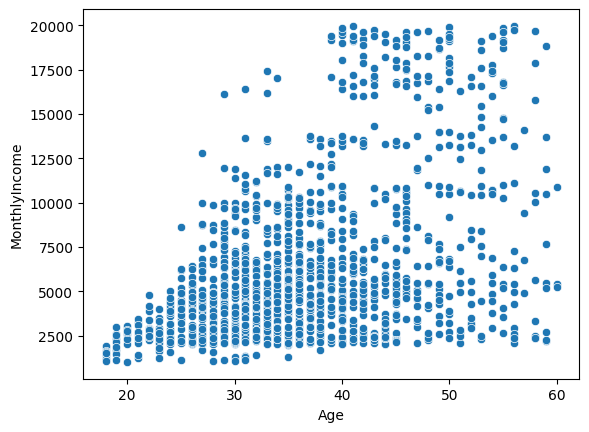

In [30]:
sns.scatterplot(data=removed_df, x='Age', y='MonthlyIncome')

- 위 산점도를 통해 **나이가 어릴수록 월 소득이 적은 것은 확실하고, 나이가 많을수록 월 소득이 많아지는 경향을 보인다**는 것을 알 수 있다.  
그러나 나이가 많아도 월 소득이 적은 사람이 존재하기에, 완전히 비례관계에 있다고 보기는 어렵다.

<Axes: xlabel='Age', ylabel='HourlyRate'>

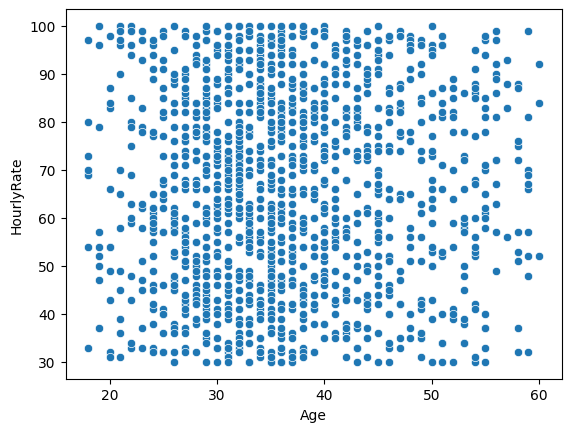

In [31]:
sns.scatterplot(data=removed_df, x='Age', y='HourlyRate')

- 그러나 위의 산점도를 통해 새로운 분석을 할 수 있는데, 바로 **시간 대비 급여의 수준은 나이에 상관이 거의 없다**는 것이다.  
즉, **나이가 적은 사람이 월 급여를 적게 받는 이유는 그만큼 일하는 시간이 적기 때문**이라는 것을 알 수 있다.

## 3.4. 그 외의 시각화 기법들

- **파이 차트(Pie chart)**: 범주형 자료를 원형의 그래프로 표현한 것

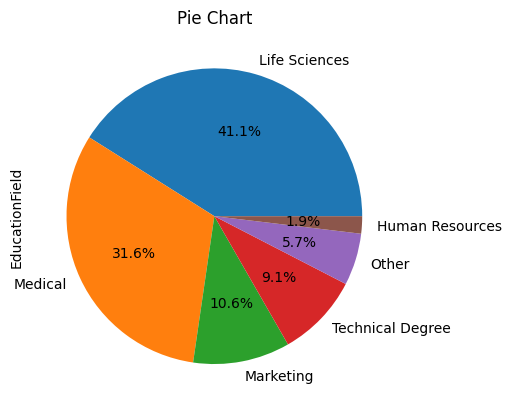

In [32]:
removed_df['EducationField'].value_counts().plot.pie(autopct='%.1f%%')
plt.title('Pie Chart')
plt.show()

- **바 차트(Bar chart)**: 범주형 자료를 막대 형태의 그래프로 표현한 것

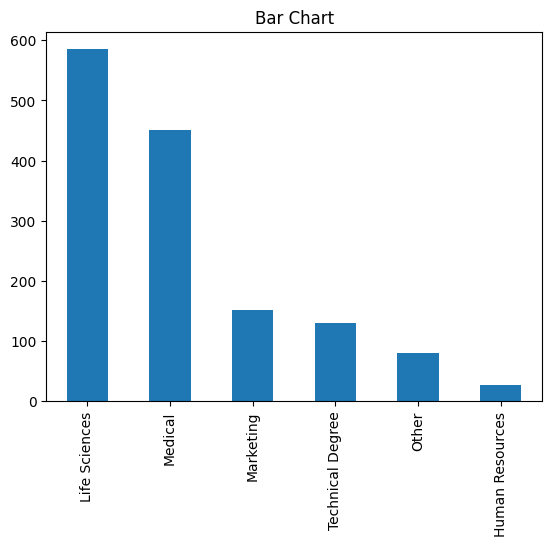

In [33]:
removed_df['EducationField'].value_counts().plot.bar()
plt.title('Bar Chart')
plt.show()

# 4. 수치형 변수간 상관관계 파악

- 수치형 변수간 상관관계를 파악하기 위해서는 산점도를 이용할 수도 있지만, 산점도로는 수치적으로 얼마나 상관관계가 있는지 확인할 수 없다. 그래서 **corrplot(상관관계 플롯)**을 이용한다.
- **피어슨 상관계수(Pearson Correlation Coefficient)**: 두 수치형 변수간의 상관관계를 -1에서 1사이의 수치로 표현해준다.  
1에 가까울수록 양의 상관관계, -1에 가까울수록 음의 상관관계가 있다고 할 수 있고,  
상관계수의 절댓값이 0에 가까울수록 약한 상관관계, 1에 가까울수록 강한 상관관계가 있다고 할 수 있다.
- **상관계수 행렬(Correlation Matrix)**: 여러 수치형 변수간의 피어슨 상관계수를 한번에 확인할 수 있도록 행렬로 만든 것.
    - **corrplot(상관관계 플롯)**은 상관계수 행렬을 그림으로 나타낸 것을 의미한다.

- 수치형 데이터에 대한 corrplot을 그려보자.

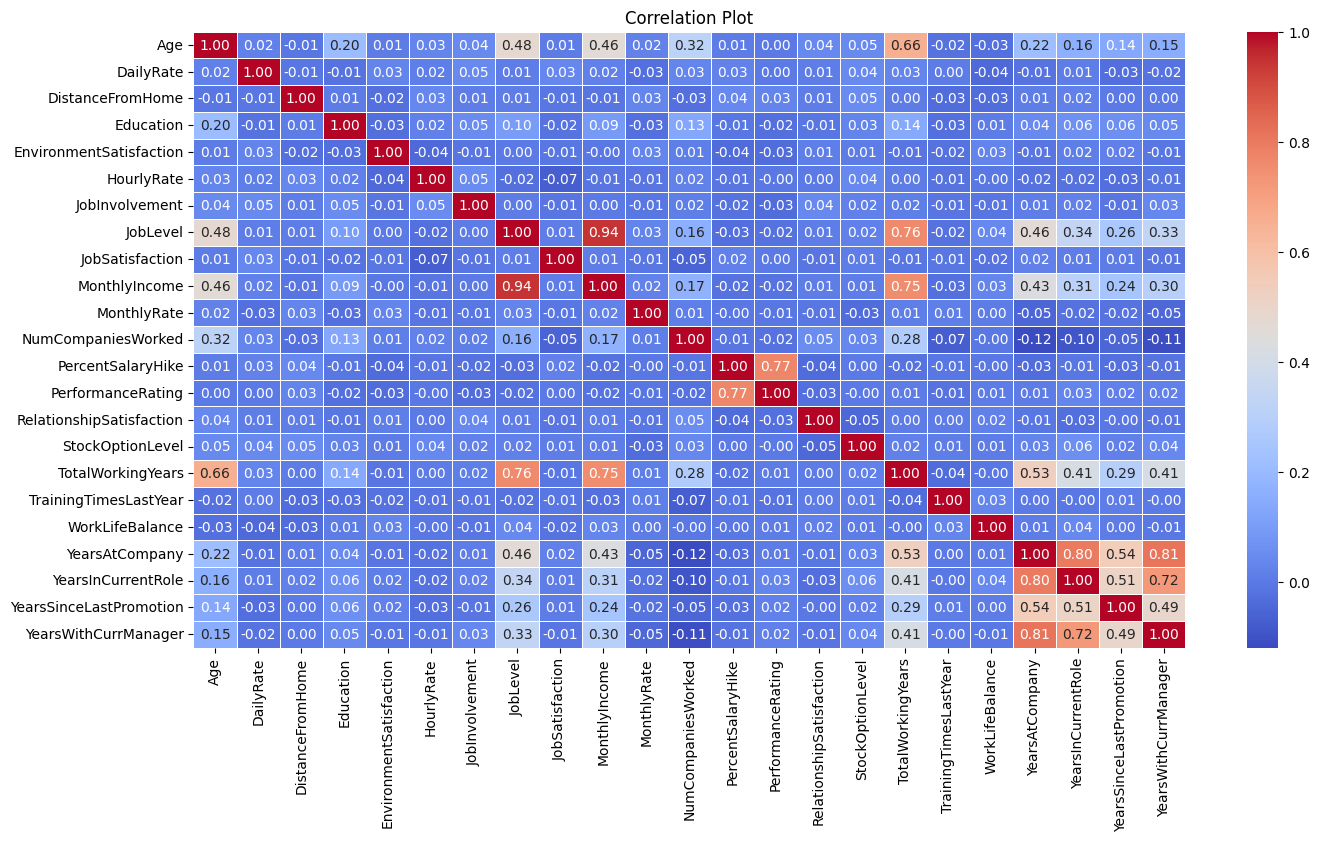

In [34]:
numerical_df = removed_df.iloc[:, numerical_indices]
corr_matrix = numerical_df.corr() # 상관계수 행렬

plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) # 상관관계 플롯
plt.title('Correlation Plot')
plt.show()

- 위 그래프를 통해 수치형 변수간의 상관계수를 한눈에 파악할 수 있다.
- 위 그래프를 통해 대표적으로 다음과 같은 것들을 분석할 수 있다.
    - **JobLevel(업무의 수준)이 높을수록 MonthlyIncome(월 소득)도 높다.**
    - **PerfewrmanceRating(업무 성과)이 높을수록 PercentageSalaryHike(급여의 증가분 백분율)도 높다.**

# 5. 파생변수 생성

- **파생변수**: 기존의 데이터를 기반으로 유의미한 새로운 변수를 만드는 것
    - 예: (시간 대비 급여의 수준) = (월 소득) / (한 달에 일한 시간)

- 주어진 35개의 변수로부터 다음과 같은 파생변수를 생성할 수 있다.
    1. YearsAtOtherCompany: 회사가 아닌 다른 곳에서 쌓은 경력 기간
        - (YearsAtOtherCompany) = (TotalWorkingYears, 경력 기간) - (YearsAtCompany, 근속 연수)
        - 2번 파생변수를 만들기 위한 변수이다.
    2. ExtraPoints: 교육의 정도와 경력을 반영한 점수
        - (ExtraPoints) = (Education, 교육의 정도)x5 + (YearsAtOtherCompany)
        - 이 점수는 추후 회사 입사 시 가산점 제도로 활용할 수 있을 것으로 예상된다.
            - 대학생(5점), 학사(10점), 석사(15점), 박사(20점), 경력 기간(1년에 1점)
        - 해당 점수와 직원의 업무 수행 능력을 비교함으로써 해당 가산점 제도가 적절한지 평가할 수 있다.
    3. CompanyScore: 회사에서의 업무 수행 능력 점수
        - (CompanyScore) = (PerformanceRating, 업무 성과)x10 + (JobInvolvement, 업무 참여도)x3 + (YearsAtCompany, 근속 연수)
        - 이 점수는 '업무 성과'가 오로지 3과 4로만 평가가 되어있다는 문제점을 극복한 업무 수행 능력 점수이다.
        - 회사에서는 업무 성과와 업무 참여도, 그리고 근속 연수를 종합적으로 평가하는 것이 일반적이므로 위와 같은 점수 변수를 생성해보았다. (회사에서 이와 같이 업무 수행 정도를 평가한다고 가정한다.)
        - 2번 파생변수와 3번 파생변수의 상관관계를 비교해보는 것도 유의미할 것이라고 예상된다.

- 위에서 만든 2번 파생변수와 3번 파생변수 사이의 상관관계를 분석해보자.
    - 양의 상관관계가 있으면 ExtraPoints는 적절한 파생변수라고 할 수 있다.
    - 상관관계가 없거나 음의 상관관계가 있으면 ExtraPoints를 가산점 제도로 활용하는 것은 적절하지 않다고 판단할 수 있다.

In [35]:
new_df = removed_df
new_df['YearsAtOtherCompany'] = new_df['TotalWorkingYears'] - new_df['YearsAtCompany'] # 파생변수 YearsAtOtherCompany 생성
new_df['ExtraPoints'] = new_df['Education']*5 + new_df['YearsAtOtherCompany'] # 파생변수 ExtraPoints 생성
new_df['CompanyScore'] = new_df['PerformanceRating']*10 + new_df['JobInvolvement']*3 + new_df['YearsAtCompany'] # 파생변수 CompanyScore 생성

In [36]:
new_df[['ExtraPoints', 'CompanyScore']]

,ExtraPoints,CompanyScore
0,12,45
1,5,56
2,17,36
3,20,47
4,9,41
...,...,...
1465,22,47
1466,7,43
1467,15,58
1468,23,45


In [37]:
new_df['ExtraPoints'].corr(new_df['CompanyScore'])

-0.08750722712238983

- ExtraPoints와 CompanyScore는 약한 음의 상관관계를 보이고 있다.
- 즉, **위와 같이 학력과 이전 경력을 가산점으로 포함하는 것은 회사의 업무 평가 기준에 부합하지 않다**고 분석할 수 있다.

In [38]:
# 가산점 비율과 평가 지표를 조금씩 수정해보자.
new_df['YearsAtOtherCompany'] = new_df['TotalWorkingYears'] - new_df['YearsAtCompany'] # 파생변수 YearsAtOtherCompany 생성
new_df['ExtraPoints'] = new_df['Education']*20 + new_df['YearsAtOtherCompany']*1 # 파생변수 ExtraPoints 생성
new_df['CompanyScore'] = new_df['PerformanceRating']*15 + new_df['JobInvolvement']*10 # 파생변수 CompanyScore 생성 (100점 만점)
new_df[['ExtraPoints', 'CompanyScore']]

,ExtraPoints,CompanyScore
0,42,75
1,20,80
2,47,65
3,80,75
4,24,75
...,...,...
1465,52,85
1466,22,65
1467,60,100
1468,68,65


In [39]:
new_df['ExtraPoints'].corr(new_df['CompanyScore'])

0.024656103648592997

- 위와 같이 파생변수에 다른 변수를 대입하거나 상수를 조절하는 과정을 통해 적절한 파생변수를 생성하는 것도 하나의 방법이 될 수 있다.

# 참고자료

1. 투빅스 20기 정규세션 1주차 EDA & GIT 강의 자료: https://drive.google.com/file/d/1jyLBJaiSQ9C_6zh8KiVAu3Dr0T5B07Ql/view?usp=drive_link
2. 이상치 탐색을 위한 통계적 방법: https://repository.hira.or.kr/bitstream/2019.oak/2240/2/%EC%9D%B4%EC%83%81%EC%B9%98%20%ED%83%90%EC%83%89%EC%9D%84%20%EC%9C%84%ED%95%9C%20%ED%86%B5%EA%B3%84%EC%A0%81%20%EB%B0%A9%EB%B2%95.pdf
3. 모자이크 플롯, 블로그: https://rfriend.tistory.com/418
4. Side-by-side box plot, stackoverflow: https://stackoverflow.com/questions/57540200/how-to-construct-a-side-by-side-boxplot-for-a-pandas-dataframe